<a href="https://colab.research.google.com/github/ismetkync/weather-classification/blob/main/weather_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 datadir = "/content/drive/MyDrive/weather-dataset"
 categories = ["cloudy", "rain", "shine", "sunrise"]

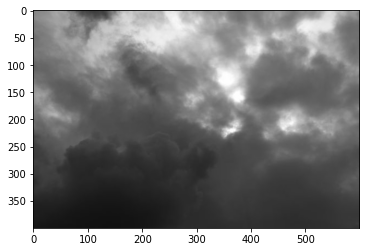

In [ ]:
for category in categories:
  path = os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img))
    plt.imshow(img_array)
    plt.show()
    break
  break

In [ ]:
print(img_array)

In [ ]:
print(img_array.shape)

(400, 600, 3)


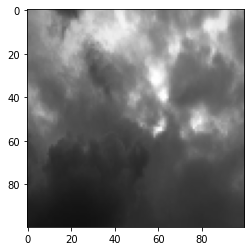

In [ ]:
#Normalizing (Resizing Images)
img_size = 100

new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(new_array)
plt.show()

In [ ]:
training_data = []

def create_training_data():
  for category in categories:
    path = os.path.join(datadir,category)
    class_num = categories.index(category) 
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array, (img_size, img_size))
        training_data.append([new_array,class_num])
      except Exception as e:
        pass
        
create_training_data()

In [ ]:
print(len(training_data))

1123


In [ ]:
#Balancing
import random

random.shuffle(training_data)

In [ ]:
for sample in training_data[:10]:
  print(sample[1])

3
3
3
2
0
2
2
1
2
0


In [ ]:
X = []
y = [] 

In [ ]:
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) 
y = np.array(y)

In [ ]:
#Saving Dataset
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out
pickle_out.close()

In [ ]:
#CNN
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D 

In [ ]:
X = pickle.load(open("X.pickle", "rb"))
y = pickle.load(open("X.pickle", "rb"))

In [ ]:
#Normalizing the values between 0-1

X = X /255 

In [ ]:
#Layers
model = Sequential()

model.add(Conv2D(32, (5,5), input_shape = (img_size,img_size,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (5,5)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(500, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(250, activation="relu"))

model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

hist = model.fit(X, y, batch_size = 256, epochs= 10, validation_split = 0.2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 22s 5s/step - loss: 1.7987 - accuracy: 0.3486 - val_loss: 1.0990 - val_accuracy: 0.4978
Epoch 2/10
4/4 [==============================] - 19s 5s/step - loss: 1.0792 - accuracy: 0.5301 - val_loss: 0.9043 - val_accuracy: 0.6400
Epoch 3/10
4/4 [==============================] - 19s 5s/step - loss: 0.9518 - accuracy: 0.5379 - val_loss: 0.8252 - val_accuracy: 0.5956
Epoch 4/10
4/4 [==============================] - 20s 5s/step - loss: 0.9134 - accuracy: 0.5612 - val_loss: 0.8460 - val_accuracy: 0.6533
Epoch 5/10
4/4 [==============================] - 19s 5s/step - loss: 0.8523 - accuracy: 0.5635 - val_loss: 0.7672 - val_accuracy: 0.5911
Epoch 6/10
4/4 [==============================] - 19s 5s/step - loss: 0.8018 - accuracy: 0.6147 - val_loss: 0.7425 - val_accuracy: 0.6311
Epoch 7/10
4/4 [==============================] - 19s 5s/step - loss: 0.7414 - accuracy: 0.6537 - val_loss: 0.6312 - val_accuracy: 0.7689
Epoch 8/10
4/4 [=============================

In [ ]:
model.evaluate(X,y)[1]

36/36 [==============================] - 8s 230ms/step - loss: 0.4718 - accuracy: 0.8353


0.8352627158164978

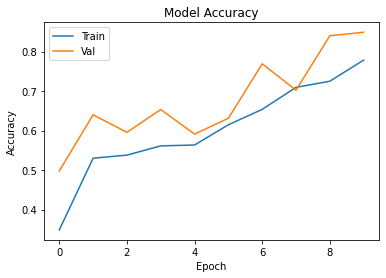

In [ ]:
#Visualizing Accuracy
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train","Val"], loc= "upper left")
plt.show()

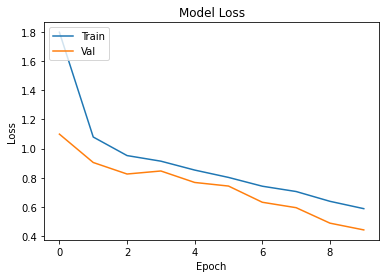

In [ ]:
#Visualizing Loss
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train","Val"], loc= "upper left")
plt.show()

In [ ]:
#Testing the model with an example
from google.colab import files
uploaded = files.upload()

Saving sunrise-example.jpg to sunrise-example (1).jpg


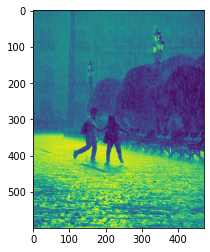

In [ ]:
#Showing Example Image
new_image = plt.imread("rain-example.jpg")
img = plt.imshow(new_image)

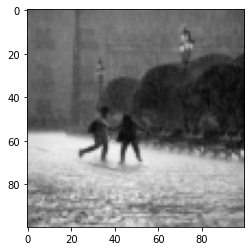

In [ ]:
#Resizing the example image
from skimage.transform import resize
resized_image = resize(new_image, (img_size,img_size,3)) 
img = plt.imshow(resized_image)

In [ ]:
#Getting the model predictions
predictions = model.predict(np.array([resized_image]))
#Showing prediction
predictions

array([[2.9068249e-01, 6.7601818e-01, 2.1043984e-02, 1.1646426e-02,
        5.4642231e-05, 1.1175797e-04, 5.1428302e-05, 5.3503809e-05,
        1.8805898e-04, 1.4948368e-04]], dtype=float32)

In [ ]:
#Sorting the predictions
list_index= [0, 1, 2, 3]
x = predictions

for i in range(4):
  for j  in range(4):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp  

print(list_index)

[1, 0, 2, 3]


In [ ]:
for i in range(4):
  print(categories[list_index[i]], ":", "%", round(predictions[0][list_index[i]] *100,2))

rain : % 67.6
cloudy : % 29.07
shine : % 2.1
sunrise : % 1.16
